# Kalkulus

2*x + y - 4
x + 4*y - 6
Titik optimal: {x: 10/7, y: 8/7}
Minimum cost: 93.71428571428571


C:\Users\72535\AppData\Local\Temp\ipykernel_28976\2255678931.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


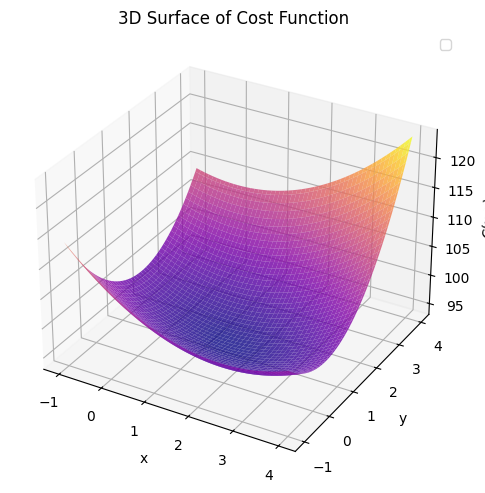

In [10]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- SymPy bagian simbolik ---
x, y = sp.symbols('x y')
C = x**2 + 2*y**2 - 4*x - 6*y + x*y + 100

# Cari titik minimum
dC_dx = sp.diff(C, x)
dC_dy = sp.diff(C, y)
crit_point = sp.solve([dC_dx, dC_dy], (x, y))
C_min = float(C.subs(crit_point))

print(dC_dx)
print(dC_dy)
print("Titik optimal:", crit_point)
print("Minimum cost:", C_min)

# --- Visualisasi ---
# Buat grid untuk x, y
X = np.linspace(-1, 4, 100)
Y = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(X, Y)

# Hitung nilai cost function
C_func = sp.lambdify((x, y), C, "numpy")
Z = C_func(X, Y)

# Plot permukaan 3D
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='plasma', alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('C(x,y)')
ax1.set_title('3D Surface of Cost Function')
ax1.legend()
plt.tight_layout()
plt.show()


In [11]:
import sympy as sp

# Variabel
x, y = sp.symbols('x y')

# Fungsi C(x,y)
C = x**2 + 2*y**2 - 4*x - 6*y + x*y + 100

# Turunan pertama
dC_dx = sp.diff(C, x)
dC_dy = sp.diff(C, y)

# Titik kritis
crit_point = sp.solve([dC_dx, dC_dy], (x, y))
print("Critical point:", crit_point)

# Matriks Hessian
H = sp.hessian(C, (x, y))
print("Hessian Matrix:")
sp.pprint(H)

# Substitusi ke titik kritis
H_eval = H.subs(crit_point)
print("Hessian at critical point:")
sp.pprint(H_eval)

# Determinan dan leading principal minors
det_H = H_eval.det()
minor1 = H_eval[0,0]   # leading principal minor pertama

print("Det(H) =", det_H)
print("Leading minor 1 =", minor1)

# Klasifikasi
if det_H > 0 and minor1 > 0:
    print("Titik stasioner adalah MINIMUM lokal (kurva terbuka ke atas)")
elif det_H > 0 and minor1 < 0:
    print("Titik stasioner adalah MAKSIMUM lokal (kurva terbuka ke bawah)")
elif det_H < 0:
    print("Titik stasioner adalah SADDLE POINT (kurva terbuka dua arah)")
else:
    print("Tidak dapat ditentukan (degenerate case)")


Critical point: {x: 10/7, y: 8/7}
Hessian Matrix:
⎡2  1⎤
⎢    ⎥
⎣1  4⎦
Hessian at critical point:
⎡2  1⎤
⎢    ⎥
⎣1  4⎦
Det(H) = 7
Leading minor 1 = 2
Titik stasioner adalah MINIMUM lokal (kurva terbuka ke atas)


# Integral

P(0.2 ≤ X ≤ 0.8) = 0.6000


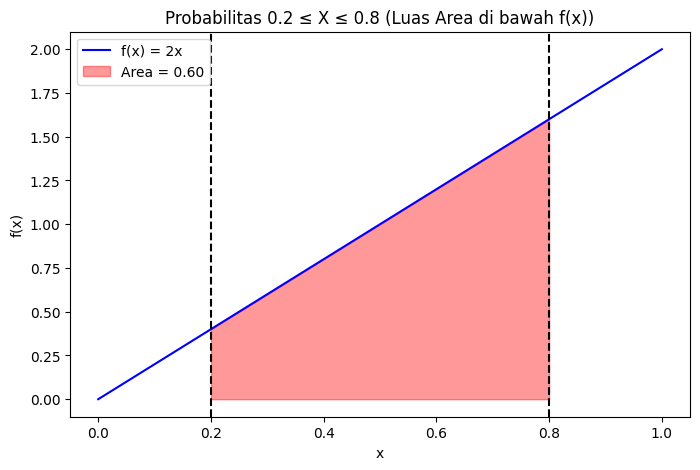

In [12]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# --- PDF sederhana ---
def pdf(x):
    return 2*x # fungsi linear

# --- Probabilitas 0.2 ≤ X ≤ 0.8 ---
a, b = 0.2, 0.8
prob, _ = quad(pdf, a, b)
print(f"P(0.2 ≤ X ≤ 0.8) = {prob:.4f}")

# --- Visualisasi ---
x_vals = np.linspace(0, 1, 200)
y_vals = [pdf(x) for x in x_vals]

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, color="blue", label="f(x) = 2x")

# Arsiran area probabilitas
x_shade = np.linspace(a, b, 100)
y_shade = [pdf(x) for x in x_shade]
plt.fill_between(x_shade, y_shade, color="red", alpha=0.4, label=f"Area = {prob:.2f}")

# Garis batas
plt.axvline(a, color="black", linestyle="--")
plt.axvline(b, color="black", linestyle="--")

# Label
plt.title("Probabilitas 0.2 ≤ X ≤ 0.8 (Luas Area di bawah f(x))")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()
